# Linear Regression

## Data Science, Machine Learning and Artificial Intelligence - by Farzad Minooei

## Business Understanding

Price Recommendation for Used Car

Marketing Requirement: 80% of predictions fall between -15% and +15% of actual price 

### Initial Setups

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
#Read data from csv file
data = pd.read_csv('cs_04.csv')
data.head()

,no,time,city,brand,production_year,color,km,body_condition,engine_condition,chassis_condition,insurance_time_to_expire,gearbox,fuel_type,price
0,1,3/26/2022,Tehran,PEUGEOT 405 GLX GAS,1393,نقره ای,80000,سالم و بی خط و خش,سالم,سالم و پلمپ,9,دنده ای,gasoline,187000000
1,2,3/5/2022,Tehran,PEUGEOT 206 SD V8,1393,سفید,85000,خط و خش جزیی,سالم,سالم و پلمپ,4,دنده ای,gasoline,215000000
2,3,3/26/2022,Tehran,PEUGEOT 206 Type 2,1397,سفید,46000,خط و خش جزیی,سالم,سالم و پلمپ,12,دنده ای,gasoline,220000000
3,4,3/19/2022,Tehran,PEUGEOT 207i AUTOMATIC,1390,سفید,165000,سالم و بی خط و خش,سالم,سالم و پلمپ,5,اتوماتیک,gasoline,275000000
4,5,3/19/2022,Tehran,PEUGEOT 207i MANUAL,1396,سفید,50000,سالم و بی خط و خش,سالم,سالم و پلمپ,7,دنده ای,gasoline,310000000


In [3]:
data.shape

(9512, 14)

## Data Understanding - Phase 1

#### 1: Understand data collection process

Data crawled from Divar website in March 2022

Note: data collection process is based on user input

#### 2: Document data set description (meta data)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9512 entries, 0 to 9511
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   no                        9512 non-null   int64 
 1   time                      9512 non-null   object
 2   city                      9512 non-null   object
 3   brand                     9512 non-null   object
 4   production_year           9512 non-null   int64 
 5   color                     9512 non-null   object
 6   km                        9512 non-null   int64 
 7   body_condition            9512 non-null   object
 8   engine_condition          9512 non-null   object
 9   chassis_condition         9512 non-null   object
 10  insurance_time_to_expire  9512 non-null   int64 
 11  gearbox                   9512 non-null   object
 12  fuel_type                 9512 non-null   object
 13  price                     9512 non-null   int64 
dtypes: int64(5), object(9)
m

0   no: number

1   time: registration date on Divar website (date)

2   city: city of residence (nominal)

3   brand: car brand name (nominal)

4   production_year: the year in which the auto was first manufactured (ordinal)

5   color: color (nominal)

6   km: kilometerage (numeric)

7   body_condition: body condition (ordinal)

8   engine_condition: engine condition (ordinal)

9   chassis_condition: chasis condition (ordinal)

10  insurance_time_to_expire: third party insurance time to expire (numeric)

11  gearbox: if aoutomatic or not (binary)

12  fuel_type: fuel type (nominal: "gasoline", "CNG", "LPG", "hybrid")

13  price: sales price in Toman (numeric)

#### 3: Check for missing values

In [5]:
print(np.sum(data.isnull(), axis = 0))

no                          0
time                        0
city                        0
brand                       0
production_year             0
color                       0
km                          0
body_condition              0
engine_condition            0
chassis_condition           0
insurance_time_to_expire    0
gearbox                     0
fuel_type                   0
price                       0
dtype: int64


#### 4: Univariate data analysis

In [6]:
print(data['no'].nunique())

9512


In [7]:
#Check if there is duplicate rows
print(np.sum(data.duplicated()))

0


In [8]:
#Convert coulumn 'time' to datetime
data['time'] = pd.to_datetime(data['time'], format = '%m/%d/%Y')
data['time'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9512 entries, 0 to 9511
Series name: time
Non-Null Count  Dtype         
--------------  -----         
9512 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 74.4 KB


In [9]:
print(data['time'].min())

2021-11-27 00:00:00


In [10]:
print(data['time'].max())

2022-04-02 00:00:00


In [11]:
print(data['time'].value_counts())

time
2022-03-12    2786
2022-03-05    1721
2022-03-19    1700
2022-03-26    1327
2022-04-02     421
2022-03-29     407
2022-03-30     388
2022-03-28     351
2022-03-27     340
2022-03-10       8
2022-02-05       6
2022-02-12       6
2022-04-01       6
2022-03-13       4
2022-02-19       4
2022-03-25       4
2022-02-26       4
2022-03-21       3
2022-03-31       3
2022-03-22       3
2022-03-20       2
2022-03-24       2
2022-03-23       2
2022-03-17       2
2022-03-11       2
2022-01-15       1
2021-12-11       1
2022-01-29       1
2022-03-14       1
2022-03-09       1
2022-03-18       1
2022-03-16       1
2022-01-22       1
2021-11-27       1
2022-03-15       1
Name: count, dtype: int64


In [12]:
#Assumption: no data drift
#data drift : occurs when the distribution of the input data changes over time.
#such as inflation in price

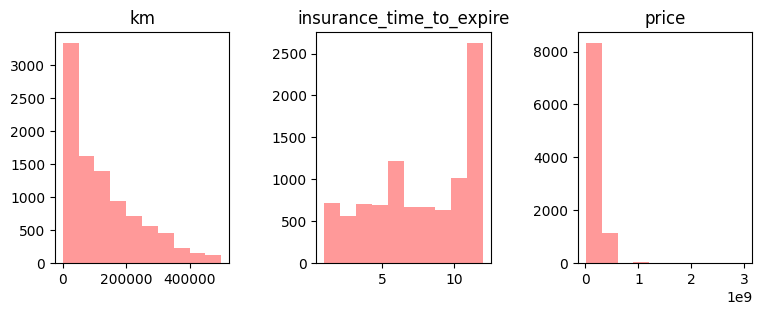

In [13]:
#Histogram of numeric variables
var_ind = [6, 10, 13]
plt.figure(figsize = (9, 3))
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
for i in range(1, 4):
    plt.subplot(1, 3, i)
    plt.hist(x = data.iloc[: , var_ind[i - 1]], alpha = 0.4, color = 'red')
    plt.title(data.columns[var_ind[i - 1]])

In [14]:
#Summary statistics of numeric variables
data[['km', 'insurance_time_to_expire', 'price']].describe()

,km,insurance_time_to_expire,price
count,9512.000000,9512.000000,9.512000e+03
mean,120604.719407,7.656644,2.143317e+08
std,113361.709352,3.351309,1.149665e+08
min,0.000000,1.000000,1.000000e+07
25%,25000.000000,5.000000,1.450000e+08
50%,92000.000000,8.000000,2.150000e+08
75%,190000.000000,11.000000,2.670000e+08
max,500000.000000,12.000000,3.000000e+09


In [15]:
#Frequency table for city
print(data['city'].value_counts())

city
Tehran     5038
Mashhad    1654
Isfahan    1528
Shiraz     1292
Name: count, dtype: int64


In [16]:
#Frequency table for brand
print(data['brand'].value_counts())

brand
PEUGEOT 405 GLX GAS                1198
PEUGEOT 206 Type 2                 1171
PEUGEOT 405 GLX CNG                 898
PEUGEOT 206 Type 5                  857
PEUGEOT 206 SD V8                   687
PEUGEOT PARS SAL                    603
PEUGEOT 405 SLX GAS                 488
PEUGEOT PARS LX TU5                 428
PEUGEOT PARS HYBRID                 350
PEUGEOT 207i AUTOMATIC              312
PEUGEOT 207i MANUAL                 308
PEUGEOT PARS SADE                   266
PEUGEOT 207i PANAROMA MANUAL        192
PEUGEOT ROA HYBRID                  182
PEUGEOT RD GAS                      143
PEUGEOT RD CNG                      132
PEUGEOT 405 GL CNG                   93
PEUGEOT 405 GL GAS                   85
PEUGEOT PARS AUTOMATIC TU5           85
PEUGEOT 405 GLX LPG                  77
PEUGEOT RD LPG                       75
PEUGEOT PARS ELX                     70
PEUGEOT 405 GLX TU5 GAS              68
PEUGEOT 206 Type 3                   58
PEUGEOT ROA GAS                   

In [17]:
print(data['brand'].nunique())
#Note: too many levels

57


In [18]:
#Frequency table for production_year
print(data['production_year'].value_counts())
#Note: Shamsy year vs. Christian year

production_year
1400    1033
1398     946
1399     934
1396     897
1397     815
1395     647
1394     556
1393     427
1390     384
1389     364
1388     271
1383     260
1385     253
1392     244
1387     243
1391     233
1384     222
1386     203
1382     162
1381     120
1380     109
1379      57
1378      38
2009      19
1377      18
1376      15
1372      12
1375       5
1374       4
2016       3
1373       3
2017       3
2008       2
2005       1
2019       1
2002       1
1997       1
1370       1
2018       1
1998       1
2000       1
2004       1
2003       1
Name: count, dtype: int64


In [19]:
#Frequency table for color
print(data['color'].value_counts())

color
سفید          4334
نقره ای       1309
خاکستری       1136
مشکی           565
نوک مدادی      493
یشمی           328
سفید صدفی      256
دلفینی         246
زرد            181
بژ             101
سبز             97
نقرآبی          68
آبی             63
عنابی           44
طوسی            38
عدسی            36
قرمز            34
بادمجانی        32
آلبالویی        30
سرمه ای         27
گیلاسی          20
ذغالی           15
اطلسی           10
زیتونی           8
بنفش             8
تیتانیوم         6
سربی             5
قهوه ای          5
زرشکی            4
نارنجی           3
برنز             2
کربن بلک         2
طلایی            2
مسی              2
پوست پیازی       1
خاکی             1
Name: count, dtype: int64


In [20]:
print(data['color'].nunique())
#Note: too many levels

36


In [21]:
#Frequency table for body_condition
print(data['body_condition'].value_counts())
#Note: too many levels

body_condition
سالم و بی خط و خش              5220
خط و خش جزیی                   2005
رنگ شدگی در ۱ ناحیه             630
دوررنگ                          604
رنگ شدگی در ۲ ناحیه             493
تمام رنگ                        198
رنگ شدگی در ۳ ناحیه             138
صافکاری بی رنگ، در ۱ ناحیه      118
رنگ شدگی در ۴ ناحیه              41
صافکاری بی رنگ، در ۲ ناحیه       28
رنگ شدگی در ۵ ناحیه              13
صافکاری بی رنگ، در ۳ ناحیه        7
صافکاری بی رنگ، در ۴ ناحیه        6
صافکاری بی رنگ، در ۱۰ ناحیه       3
رنگ شدگی در ۶ ناحیه               3
اوراقی                            2
رنگ شدگی در ۸ ناحیه               1
صافکاری بی رنگ، در ۵ ناحیه        1
رنگ شدگی در ۷ ناحیه               1
Name: count, dtype: int64


In [22]:
#Frequency table for engine_condition
print(data['engine_condition'].value_counts())

engine_condition
سالم             9405
نیاز به تعمیر      65
تعویض شده          42
Name: count, dtype: int64


In [23]:
#Frequency table for chassis_condition
print(data['chassis_condition'].value_counts())

chassis_condition
سالم و پلمپ    9381
ضربه خورده      116
رنگ شده          15
Name: count, dtype: int64


In [24]:
#Frequency table for gearbox
print(data['gearbox'].value_counts())

gearbox
دنده ای     8897
اتوماتیک     615
Name: count, dtype: int64


In [25]:
#Frequency table for fuel_type
print(data['fuel_type'].value_counts())

fuel_type
gasoline    7541
CNG         1171
hybrid       633
LPG          167
Name: count, dtype: int64


## Data Preparation

In [26]:
#Extract the model from brand name
data['model'] = data['brand'].apply(lambda s: s.split()[1])
print(data['model'].value_counts())

model
405     3093
206     2944
PARS    1821
207i     888
RD       350
ROA      289
RDI       48
2008      43
407       20
404        4
508        4
504        3
301        2
205        2
406        1
Name: count, dtype: int64


In [27]:
#Reduce the number of levels in brand
data.loc[data['model'].isin(['404', '508', '504', '301', '205', '406']), 'model'] = 'other'
print(data['model'].value_counts())

model
405      3093
206      2944
PARS     1821
207i      888
RD        350
ROA       289
RDI        48
2008       43
407        20
other      16
Name: count, dtype: int64


In [28]:
data.loc[data['model'] == 'other', :]
#Note: PEUGEOT 404 production years are suspecious!

,no,time,city,brand,production_year,color,km,body_condition,engine_condition,chassis_condition,insurance_time_to_expire,gearbox,fuel_type,price,model
936,937,2022-03-29,Tehran,PEUGEOT 404,2005,بژ,111111,خط و خش جزیی,سالم,سالم و پلمپ,3,دنده ای,gasoline,90000000,other
1422,1423,2022-03-12,Tehran,PEUGEOT 301,2016,سفید,45000,سالم و بی خط و خش,سالم,سالم و پلمپ,11,اتوماتیک,gasoline,690000000,other
1775,1776,2022-03-05,Tehran,PEUGEOT 406,2019,سفید,32000,سالم و بی خط و خش,سالم,سالم و پلمپ,9,دنده ای,gasoline,280000000,other
2259,2260,2022-03-19,Tehran,PEUGEOT 404,2002,مشکی,400000,خط و خش جزیی,سالم,سالم و پلمپ,11,دنده ای,gasoline,90000000,other
2515,2516,2022-03-26,Tehran,PEUGEOT 301,2016,سفید,70000,سالم و بی خط و خش,سالم,سالم و پلمپ,10,اتوماتیک,gasoline,650000000,other
2905,2906,2022-04-02,Tehran,PEUGEOT 205,1997,طوسی,250,دوررنگ,سالم,سالم و پلمپ,6,دنده ای,gasoline,45000000,other
2993,2994,2022-03-05,Tehran,PEUGEOT 508 GT,2017,سفید صدفی,4000,سالم و بی خط و خش,سالم,سالم و پلمپ,11,اتوماتیک,gasoline,1520000000,other
3817,3818,2022-03-05,Tehran,PEUGEOT 404,2018,نوک مدادی,89000,رنگ شدگی در ۲ ناحیه,سالم,سالم و پلمپ,5,دنده ای,gasoline,180000000,other
4800,4801,2022-03-26,Tehran,PEUGEOT 508 GT,2017,سفید صدفی,4000,سالم و بی خط و خش,سالم,سالم و پلمپ,11,اتوماتیک,gasoline,1605000000,other
5913,5914,2022-03-27,Mashhad,PEUGEOT 508 GT,2016,سفید صدفی,89000,سالم و بی خط و خش,سالم,سالم و پلمپ,10,اتوماتیک,gasoline,1480000000,other


In [29]:
#Convert Christian year to Shamsy year
data['shamsy_year'] = data['production_year']
data.loc[data['shamsy_year'] > 1900, 'shamsy_year'] = data.loc[data['shamsy_year'] > 1900, 'shamsy_year'] - 621
print(data['shamsy_year'].min())
print(data['shamsy_year'].max())

1370
1400


In [30]:
#Create new feature based on production year
data['age'] = 1401 - data['shamsy_year']
#Check the results
print(np.sum(data['age'].isnull()))
data.head()

0


,no,time,city,brand,production_year,color,km,body_condition,engine_condition,chassis_condition,insurance_time_to_expire,gearbox,fuel_type,price,model,shamsy_year,age
0,1,2022-03-26,Tehran,PEUGEOT 405 GLX GAS,1393,نقره ای,80000,سالم و بی خط و خش,سالم,سالم و پلمپ,9,دنده ای,gasoline,187000000,405,1393,8
1,2,2022-03-05,Tehran,PEUGEOT 206 SD V8,1393,سفید,85000,خط و خش جزیی,سالم,سالم و پلمپ,4,دنده ای,gasoline,215000000,206,1393,8
2,3,2022-03-26,Tehran,PEUGEOT 206 Type 2,1397,سفید,46000,خط و خش جزیی,سالم,سالم و پلمپ,12,دنده ای,gasoline,220000000,206,1397,4
3,4,2022-03-19,Tehran,PEUGEOT 207i AUTOMATIC,1390,سفید,165000,سالم و بی خط و خش,سالم,سالم و پلمپ,5,اتوماتیک,gasoline,275000000,207i,1390,11
4,5,2022-03-19,Tehran,PEUGEOT 207i MANUAL,1396,سفید,50000,سالم و بی خط و خش,سالم,سالم و پلمپ,7,دنده ای,gasoline,310000000,207i,1396,5


In [31]:
#Reduce the number of levels in color
print(round(data['color'].value_counts() / data.shape[0] * 100, 2))

color
سفید          45.56
نقره ای       13.76
خاکستری       11.94
مشکی           5.94
نوک مدادی      5.18
یشمی           3.45
سفید صدفی      2.69
دلفینی         2.59
زرد            1.90
بژ             1.06
سبز            1.02
نقرآبی         0.71
آبی            0.66
عنابی          0.46
طوسی           0.40
عدسی           0.38
قرمز           0.36
بادمجانی       0.34
آلبالویی       0.32
سرمه ای        0.28
گیلاسی         0.21
ذغالی          0.16
اطلسی          0.11
زیتونی         0.08
بنفش           0.08
تیتانیوم       0.06
سربی           0.05
قهوه ای        0.05
زرشکی          0.04
نارنجی         0.03
برنز           0.02
کربن بلک       0.02
طلایی          0.02
مسی            0.02
پوست پیازی     0.01
خاکی           0.01
Name: count, dtype: float64


In [32]:
#Main colors
data['color_levels'] = data['color'].replace(['سفید',
                                              'نقره ای',
                                              'خاکستری',
                                              'مشکی',                                     
                                              'نوک مدادی'],
                                             ['white',
                                              'silver',
                                              'gray',
                                              'black',                                             
                                              'graphite gray'],
                                            inplace = False)

#Other colors
data.loc[~ data['color_levels'].isin(['white',
                                      'silver',
                                      'gray',
                                      'black',                                             
                                      'graphite gray']), 'color_levels'] = 'other'

#Check the results
print(np.sum(data['color_levels'].isnull()))
print(data['color_levels'].value_counts())

0
color_levels
white            4334
other            1675
silver           1309
gray             1136
black             565
graphite gray     493
Name: count, dtype: int64


In [33]:
#Convert body_condition into numeric variable
data['b_cond'] = data['body_condition'].replace(['سالم و بی خط و خش',
                                                 'خط و خش جزیی',
                                                 'صافکاری بی رنگ، در ۱ ناحیه',
                                                 'صافکاری بی رنگ، در ۲ ناحیه',
                                                 'صافکاری بی رنگ، در ۳ ناحیه',
                                                 'صافکاری بی رنگ، در ۴ ناحیه',
                                                 'صافکاری بی رنگ، در ۵ ناحیه',
                                                 'صافکاری بی رنگ، در ۶ ناحیه',
                                                 'صافکاری بی رنگ، در ۹ ناحیه',
                                                 'صافکاری بی رنگ، در ۱۰ ناحیه',
                                                 'رنگ شدگی در ۱ ناحیه',
                                                 'رنگ شدگی در ۲ ناحیه',
                                                 'رنگ شدگی در ۳ ناحیه',
                                                 'رنگ شدگی در ۴ ناحیه',
                                                 'رنگ شدگی در ۵ ناحیه',
                                                 'رنگ شدگی در ۶ ناحیه',       
                                                 'رنگ شدگی در ۷ ناحیه',  
                                                 'رنگ شدگی در ۸ ناحیه',    
                                                 'رنگ شدگی در ۹ ناحیه',
                                                 'رنگ شدگی در ۱۰ ناحیه',
                                                 'دوررنگ',
                                                 'تمام رنگ',
                                                 'اوراقی'],
                                                 [str(_) for _ in range(1, 24)], inplace = False).astype(int)

#Check the results
print(np.sum(data['b_cond'].isnull()))
print(data['b_cond'].describe())

0
count    9512.000000
mean        4.455635
std         6.260655
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        23.000000
Name: b_cond, dtype: float64


In [34]:
#Convert Persian language into English for engine_condition
data['e_cond'] = data['engine_condition'].replace(['سالم',
                                                   'تعویض شده',
                                                   'نیاز به تعمیر'], 
                                                  ['A', 'B', 'C'], inplace = False)

#Check the results
print(np.sum(data['e_cond'].isnull()))
print(data['e_cond'].value_counts())

0
e_cond
A    9405
C      65
B      42
Name: count, dtype: int64


In [35]:
#Convert Persian language into English for chassis_condition
data['c_cond'] = data['chassis_condition'].replace(['سالم و پلمپ',
                                                    'ضربه خورده',
                                                    'رنگ شده'], 
                                                   ['A', 'B', 'C'], inplace = False)

#Check the results
print(np.sum(data['c_cond'].isnull()))
print(data['c_cond'].value_counts())

0
c_cond
A    9381
B     116
C      15
Name: count, dtype: int64


In [36]:
#Convert Persian language into English for gearbox
data['if_automatic'] = data['gearbox'].replace(['دنده ای', 
                                                'اتوماتیک'], 
                                               ['no', 'yes'], inplace = False)

#Check the results
print(np.sum(data['if_automatic'].isnull()))
print(data['if_automatic'].value_counts())

0
if_automatic
no     8897
yes     615
Name: count, dtype: int64


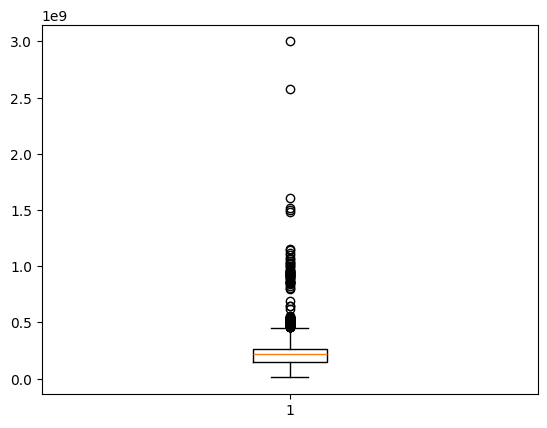

In [37]:
#Check for outliers
plt.boxplot(data['price'])
plt.show()

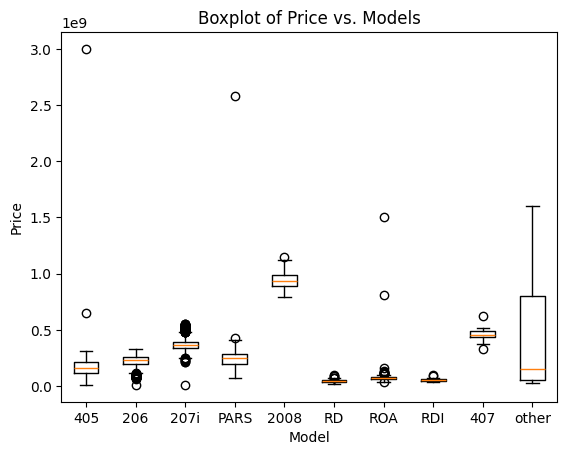

In [38]:
#Boxplot for multiple groups
plt.boxplot([data.loc[data['model'] == _, 'price'] for _ in data['model'].unique()])
plt.title('Boxplot of Price vs. Models')
plt.xticks(ticks = list(range(1, 11)), 
           labels = data['model'].unique())
plt.xlabel('Model')
plt.ylabel('Price')
plt.show()

In [39]:
#Price statistics summary by model
data.groupby('model')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
2008,43.0,9.445581e+08,8.129233e+07,795000000.0,892500000.0,933000000.0,990000000.0,1.150000e+09
206,2944.0,2.230163e+08,5.189852e+07,11000000.0,200000000.0,230000000.0,258000000.0,3.300000e+08
207i,888.0,3.709107e+08,6.526604e+07,10000000.0,337000000.0,363500000.0,395000000.0,5.550000e+08
405,3093.0,1.651462e+08,8.075183e+07,11111111.0,116000000.0,163000000.0,210000000.0,3.000000e+09
407,20.0,4.593500e+08,6.203163e+07,330000000.0,433750000.0,452500000.0,488000000.0,6.200000e+08
PARS,1821.0,2.428981e+08,8.339237e+07,75000000.0,195000000.0,253000000.0,281500000.0,2.580000e+09
RD,350.0,4.627571e+07,1.065170e+07,20000000.0,39000000.0,45000000.0,52000000.0,1.000000e+08
RDI,48.0,5.612500e+07,1.175526e+07,39000000.0,47750000.0,55000000.0,61500000.0,1.000000e+08
ROA,289.0,7.931073e+07,9.571477e+07,38000000.0,63000000.0,70000000.0,79000000.0,1.500000e+09


In [40]:
#Outlier detection using Tukey's method
from scipy.stats import iqr
def outlier_detector(df, colname = 'price'):
    #Calculate lower band and upper bound for Tukey's method
    lb = np.quantile(df[colname], 0.25) - 1.5 * iqr(df[colname])
    ub = np.quantile(df[colname], 0.75) + 1.5 * iqr(df[colname])
    #Return rows w/ outliers in colname
    return df.loc[(df[colname] > ub) | (df[colname] < lb), :]

In [41]:
#Check outliers for 206
pd.set_option('display.max_rows', 200)
outlier_detector(df = data.loc[data['model'] == '206', :])
#Note: check index 1209

,no,time,city,brand,production_year,color,km,body_condition,engine_condition,chassis_condition,...,fuel_type,price,model,shamsy_year,age,color_levels,b_cond,e_cond,c_cond,if_automatic
57,58,2022-03-12,Tehran,PEUGEOT 206 Type 2,1387,نوک مدادی,293563,خط و خش جزیی,سالم,سالم و پلمپ,...,gasoline,112000000,206,1387,14,graphite gray,2,A,A,no
85,86,2022-03-19,Tehran,PEUGEOT 206 Type 2,1382,نقره ای,260000,خط و خش جزیی,سالم,سالم و پلمپ,...,gasoline,94000000,206,1382,19,silver,2,A,A,no
112,113,2022-03-12,Tehran,PEUGEOT 206 Type 2,1385,نقره ای,329000,خط و خش جزیی,سالم,سالم و پلمپ,...,gasoline,110000000,206,1385,16,silver,2,A,A,no
303,304,2022-03-19,Tehran,PEUGEOT 206 Type 2,1382,یشمی,450000,سالم و بی خط و خش,سالم,سالم و پلمپ,...,gasoline,85700000,206,1382,19,other,1,A,A,no
318,319,2022-03-05,Tehran,PEUGEOT 206 Type 2,1383,نقره ای,287700,دوررنگ,سالم,ضربه خورده,...,gasoline,83000000,206,1383,18,silver,21,A,B,no
381,382,2022-03-26,Tehran,PEUGEOT 206 Type 4,1381,مشکی,338228,خط و خش جزیی,سالم,سالم و پلمپ,...,gasoline,100000000,206,1381,20,black,2,A,A,yes
382,383,2022-04-02,Tehran,PEUGEOT 206 Type 2,1383,نقره ای,390000,خط و خش جزیی,سالم,سالم و پلمپ,...,gasoline,100000000,206,1383,18,silver,2,A,A,no
393,394,2022-03-05,Tehran,PEUGEOT 206 Type 2,1384,بژ,320000,خط و خش جزیی,سالم,سالم و پلمپ,...,gasoline,100000000,206,1384,17,other,2,A,A,no
466,467,2022-03-30,Tehran,PEUGEOT 206 Type 2,1383,نقره ای,400000,رنگ شدگی در ۱ ناحیه,نیاز به تعمیر,سالم و پلمپ,...,gasoline,95000000,206,1383,18,silver,11,C,A,no
487,488,2022-03-12,Tehran,PEUGEOT 206 Type 2,1384,مشکی,400000,سالم و بی خط و خش,سالم,سالم و پلمپ,...,gasoline,99000000,206,1384,17,black,1,A,A,no


In [42]:
#Check outliers for 207i
outlier_detector(df = data.loc[data['model'] == '207i', :])
#Note: check index 9196

,no,time,city,brand,production_year,color,km,body_condition,engine_condition,chassis_condition,...,fuel_type,price,model,shamsy_year,age,color_levels,b_cond,e_cond,c_cond,if_automatic
8,9,2022-03-26,Tehran,PEUGEOT 207i SD AUTOMATIC,1398,خاکستری,0,سالم و بی خط و خش,سالم,سالم و پلمپ,...,gasoline,490000000,207i,1398,3,gray,1,A,A,yes
10,11,2022-03-19,Tehran,PEUGEOT 207i AUTOMATIC,1400,مشکی,8000,سالم و بی خط و خش,سالم,سالم و پلمپ,...,gasoline,500000000,207i,1400,1,black,1,A,A,yes
69,70,2022-03-27,Tehran,PEUGEOT 207i PANAROMA AUTOMATIC,1400,سفید,4000,سالم و بی خط و خش,سالم,سالم و پلمپ,...,gasoline,525000000,207i,1400,1,white,1,A,A,yes
89,90,2022-03-19,Tehran,PEUGEOT 207i PANAROMA AUTOMATIC,1400,مشکی,5277,سالم و بی خط و خش,سالم,سالم و پلمپ,...,gasoline,535000000,207i,1400,1,black,1,A,A,yes
104,105,2022-03-12,Tehran,PEUGEOT 207i PANAROMA AUTOMATIC,1400,سفید,8000,سالم و بی خط و خش,سالم,سالم و پلمپ,...,gasoline,510000000,207i,1400,1,white,1,A,A,yes
284,285,2022-03-19,Tehran,PEUGEOT 207i AUTOMATIC,1400,سفید صدفی,0,سالم و بی خط و خش,سالم,سالم و پلمپ,...,gasoline,490000000,207i,1400,1,other,1,A,A,yes
364,365,2022-03-05,Tehran,PEUGEOT 207i AUTOMATIC,1400,سفید,11000,سالم و بی خط و خش,سالم,سالم و پلمپ,...,gasoline,517000000,207i,1400,1,white,1,A,A,yes
366,367,2022-03-19,Tehran,PEUGEOT 207i AUTOMATIC,1400,مشکی,0,سالم و بی خط و خش,سالم,سالم و پلمپ,...,gasoline,520000000,207i,1400,1,black,1,A,A,yes
373,374,2022-03-12,Tehran,PEUGEOT 207i AUTOMATIC,1399,سفید,0,سالم و بی خط و خش,سالم,سالم و پلمپ,...,gasoline,500000000,207i,1399,2,white,1,A,A,no
453,454,2022-03-12,Tehran,PEUGEOT 207i AUTOMATIC,1389,نقره ای,180000,سالم و بی خط و خش,سالم,سالم و پلمپ,...,gasoline,248000000,207i,1389,12,silver,1,A,A,yes


In [43]:
#Check outliers for 405
outlier_detector(df = data.loc[data['model'] == '405', :])
#Note: check index 4550 and 5141

,no,time,city,brand,production_year,color,km,body_condition,engine_condition,chassis_condition,...,fuel_type,price,model,shamsy_year,age,color_levels,b_cond,e_cond,c_cond,if_automatic
4550,4551,2022-03-19,Tehran,PEUGEOT 405 GLi GAS,1400,نقره ای,0,سالم و بی خط و خش,سالم,سالم و پلمپ,...,gasoline,3000000000,405,1400,1,silver,1,A,A,yes
5141,5142,2022-03-05,Mashhad,PEUGEOT 405 GL GAS,1380,زرشکی,300000,دوررنگ,سالم,سالم و پلمپ,...,gasoline,650000000,405,1380,21,other,21,A,A,no


In [44]:
#Check outliers for PARS
outlier_detector(df = data.loc[data['model'] == 'PARS', :])
#Note: check index 6147

,no,time,city,brand,production_year,color,km,body_condition,engine_condition,chassis_condition,...,fuel_type,price,model,shamsy_year,age,color_levels,b_cond,e_cond,c_cond,if_automatic
2353,2354,2022-03-19,Tehran,PEUGEOT PARS AUTOMATIC TU5,1399,سفید,9000,سالم و بی خط و خش,سالم,سالم و پلمپ,...,gasoline,425000000,PARS,1399,2,white,1,A,A,yes
6147,6148,2022-03-05,Mashhad,PEUGEOT PARS ELX,1398,سفید,57,سالم و بی خط و خش,سالم,سالم و پلمپ,...,gasoline,2580000000,PARS,1398,3,white,1,A,A,no


In [45]:
#Check outliers for ROA
outlier_detector(df = data.loc[data['model'] == 'ROA', :])
#Note: check index 989 and 4996

,no,time,city,brand,production_year,color,km,body_condition,engine_condition,chassis_condition,...,fuel_type,price,model,shamsy_year,age,color_levels,b_cond,e_cond,c_cond,if_automatic
989,990,2022-03-26,Tehran,PEUGEOT ROA HYBRID,1387,زرد,500000,دوررنگ,نیاز به تعمیر,ضربه خورده,...,hybrid,1500000000,ROA,1387,14,other,21,C,B,no
1925,1926,2022-03-27,Tehran,PEUGEOT ROA HYBRID,1386,زرد,300000,خط و خش جزیی,سالم,سالم و پلمپ,...,hybrid,38000000,ROA,1386,15,other,2,A,A,no
2399,2400,2022-03-26,Tehran,PEUGEOT ROA SAL HYBRID,1390,زرد,500000,سالم و بی خط و خش,سالم,سالم و پلمپ,...,hybrid,125000000,ROA,1390,11,other,1,A,A,no
2434,2435,2022-03-12,Tehran,PEUGEOT ROA SAL GAS,1389,نقره ای,34000,سالم و بی خط و خش,سالم,سالم و پلمپ,...,gasoline,121000000,ROA,1389,12,silver,1,A,A,no
2900,2901,2022-03-19,Tehran,PEUGEOT ROA SAL HYBRID,1389,نوک مدادی,280000,سالم و بی خط و خش,سالم,سالم و پلمپ,...,hybrid,112500000,ROA,1389,12,graphite gray,1,A,A,no
3681,3682,2022-03-12,Tehran,PEUGEOT ROA SAL HYBRID,1390,زرد,0,صافکاری بی رنگ، در ۱۰ ناحیه,سالم,سالم و پلمپ,...,hybrid,165000000,ROA,1390,11,other,10,A,A,no
4160,4161,2022-04-02,Tehran,PEUGEOT ROA HYBRID,1387,زرد,350000,رنگ شدگی در ۱ ناحیه,سالم,سالم و پلمپ,...,hybrid,120000000,ROA,1387,14,other,11,A,A,no
4996,4997,2022-03-12,Tehran,PEUGEOT ROA HYBRID,1387,نوک مدادی,310002,سالم و بی خط و خش,سالم,سالم و پلمپ,...,hybrid,810000000,ROA,1387,14,graphite gray,1,A,A,no
5547,5548,2022-03-29,Mashhad,PEUGEOT ROA SAL HYBRID,1390,نقره ای,285000,سالم و بی خط و خش,سالم,سالم و پلمپ,...,hybrid,109500000,ROA,1390,11,silver,1,A,A,no
6488,6489,2022-03-27,Mashhad,PEUGEOT ROA SAL HYBRID,1390,نقره ای,260000,سالم و بی خط و خش,سالم,سالم و پلمپ,...,hybrid,110000000,ROA,1390,11,silver,1,A,A,no


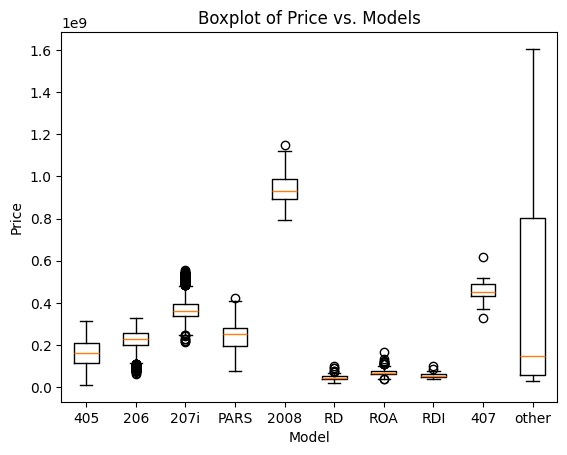

In [46]:
#Type of outliers: procedural error
data.drop(index = [989, 1209, 4550, 4996, 5141, 6147, 9196], inplace = True)

#Boxplot for multiple groups
plt.boxplot([data.loc[data['model'] == _, 'price'] for _ in data['model'].unique()])
plt.title('Boxplot of Price vs. Models')
plt.xticks(ticks = list(range(1, 11)), 
           labels = data['model'].unique())
plt.xlabel('Model')
plt.ylabel('Price')
plt.show()

## Data Understanding - Phase 2

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9505 entries, 0 to 9511
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   no                        9505 non-null   int64         
 1   time                      9505 non-null   datetime64[ns]
 2   city                      9505 non-null   object        
 3   brand                     9505 non-null   object        
 4   production_year           9505 non-null   int64         
 5   color                     9505 non-null   object        
 6   km                        9505 non-null   int64         
 7   body_condition            9505 non-null   object        
 8   engine_condition          9505 non-null   object        
 9   chassis_condition         9505 non-null   object        
 10  insurance_time_to_expire  9505 non-null   int64         
 11  gearbox                   9505 non-null   object        
 12  fuel_type                

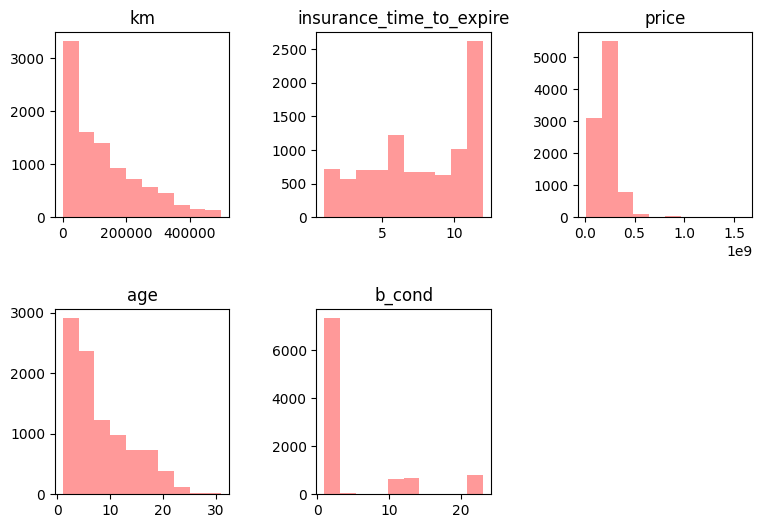

In [48]:
#Histogram of numeric variables
var_ind = [6, 10, 13, 16, 18]
plt.figure(figsize = (9, 6))
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
for i in range(1, 6):
    plt.subplot(2, 3, i)
    plt.hist(x = data.iloc[: , var_ind[i - 1]], alpha = 0.4, color = 'red')
    plt.title(data.columns[var_ind[i - 1]])

#### 5: Bivariate data analysis

In [49]:
#Correlation analysis
round(data.iloc[:, [13, 6, 10, 16, 18]].corr(method = 'pearson'), 2)

,price,km,insurance_time_to_expire,age,b_cond
price,1.00,-0.60,0.04,-0.74,-0.40
km,-0.60,1.00,-0.07,0.73,0.38
insurance_time_to_expire,0.04,-0.07,1.00,-0.05,-0.04
age,-0.74,0.73,-0.05,1.00,0.48
b_cond,-0.40,0.38,-0.04,0.48,1.00


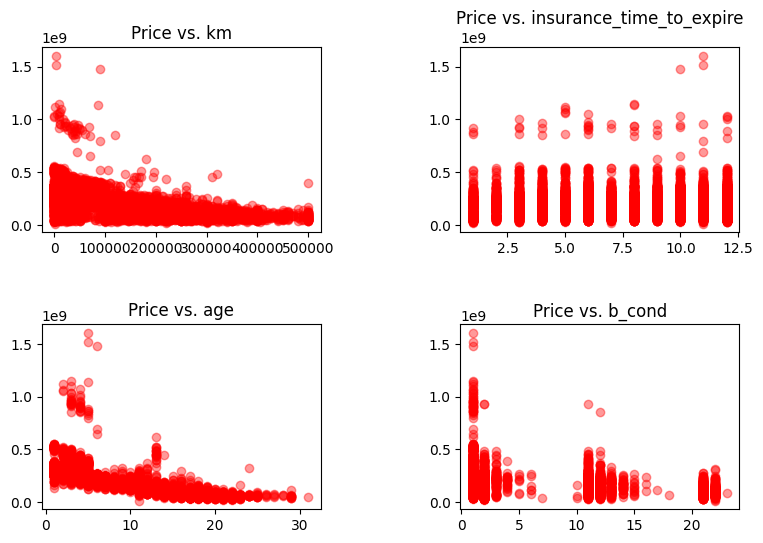

In [50]:
#Scatter plot
var_ind = [6, 10, 16, 18]
plt.figure(figsize = (9, 6))
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
for i in range(1, 5):
    plt.subplot(2, 2, i)
    plt.scatter(x = data.iloc[: , var_ind[i - 1]], y = data['price'], alpha = 0.4, color = 'red')
    plt.title('Price vs. ' + data.columns[var_ind[i - 1]])

## Build Linear Regression Model

In [51]:
#Split data into test and train
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.3, random_state = 123)
print(train.shape)
print(test.shape)

(6653, 22)
(2852, 22)


In [52]:
#Check dataframe columns and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9505 entries, 0 to 9511
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   no                        9505 non-null   int64         
 1   time                      9505 non-null   datetime64[ns]
 2   city                      9505 non-null   object        
 3   brand                     9505 non-null   object        
 4   production_year           9505 non-null   int64         
 5   color                     9505 non-null   object        
 6   km                        9505 non-null   int64         
 7   body_condition            9505 non-null   object        
 8   engine_condition          9505 non-null   object        
 9   chassis_condition         9505 non-null   object        
 10  insurance_time_to_expire  9505 non-null   int64         
 11  gearbox                   9505 non-null   object        
 12  fuel_type                

In [53]:
#Create dummy variables for categorical variables
dummy_vars = pd.get_dummies(train[['city',
                                   'fuel_type',
                                   'model',
                                   'color_levels', 
                                   'e_cond', 
                                   'c_cond', 
                                   'if_automatic']])
dummy_vars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6653 entries, 9085 to 3584
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   city_Isfahan                6653 non-null   bool 
 1   city_Mashhad                6653 non-null   bool 
 2   city_Shiraz                 6653 non-null   bool 
 3   city_Tehran                 6653 non-null   bool 
 4   fuel_type_CNG               6653 non-null   bool 
 5   fuel_type_LPG               6653 non-null   bool 
 6   fuel_type_gasoline          6653 non-null   bool 
 7   fuel_type_hybrid            6653 non-null   bool 
 8   model_2008                  6653 non-null   bool 
 9   model_206                   6653 non-null   bool 
 10  model_207i                  6653 non-null   bool 
 11  model_405                   6653 non-null   bool 
 12  model_407                   6653 non-null   bool 
 13  model_PARS                  6653 non-null   bool 
 14  model_RD  

In [54]:
dummy_vars.head()

,city_Isfahan,city_Mashhad,city_Shiraz,city_Tehran,fuel_type_CNG,fuel_type_LPG,fuel_type_gasoline,fuel_type_hybrid,model_2008,model_206,...,color_levels_silver,color_levels_white,e_cond_A,e_cond_B,e_cond_C,c_cond_A,c_cond_B,c_cond_C,if_automatic_no,if_automatic_yes
9085,False,False,True,False,True,False,False,False,False,False,...,True,False,True,False,False,True,False,False,True,False
3491,False,False,False,True,False,False,True,False,False,False,...,False,False,True,False,False,True,False,False,False,True
1091,False,False,False,True,False,False,True,False,False,False,...,False,False,True,False,False,True,False,False,True,False
701,False,False,False,True,False,False,True,False,False,False,...,False,False,True,False,False,True,False,False,True,False
3733,False,False,False,True,False,False,True,False,False,False,...,False,True,True,False,False,True,False,False,True,False


In [55]:
#Define base level for each categorical variable
dummy_vars.drop(columns = ['city_Tehran',
                           'fuel_type_gasoline',
                           'model_405',
                           'color_levels_white', 
                           'e_cond_A', 
                           'c_cond_A', 
                           'if_automatic_no' 
                           ], inplace = True)
dummy_vars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6653 entries, 9085 to 3584
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   city_Isfahan                6653 non-null   bool 
 1   city_Mashhad                6653 non-null   bool 
 2   city_Shiraz                 6653 non-null   bool 
 3   fuel_type_CNG               6653 non-null   bool 
 4   fuel_type_LPG               6653 non-null   bool 
 5   fuel_type_hybrid            6653 non-null   bool 
 6   model_2008                  6653 non-null   bool 
 7   model_206                   6653 non-null   bool 
 8   model_207i                  6653 non-null   bool 
 9   model_407                   6653 non-null   bool 
 10  model_PARS                  6653 non-null   bool 
 11  model_RD                    6653 non-null   bool 
 12  model_RDI                   6653 non-null   bool 
 13  model_ROA                   6653 non-null   bool 
 14  model_othe

In [56]:
#Define feature matrix 
X_ = train[['km', 'insurance_time_to_expire', 'age', 'b_cond']]
X_train = pd.concat([X_, dummy_vars], axis = 1)
X_train.head()

,km,insurance_time_to_expire,age,b_cond,city_Isfahan,city_Mashhad,city_Shiraz,fuel_type_CNG,fuel_type_LPG,fuel_type_hybrid,...,color_levels_black,color_levels_graphite gray,color_levels_gray,color_levels_other,color_levels_silver,e_cond_B,e_cond_C,c_cond_B,c_cond_C,if_automatic_yes
9085,0,11,15,22,False,False,True,True,False,False,...,False,False,False,False,True,False,False,False,False,False
3491,0,9,1,1,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
1091,33000,7,2,1,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
701,272002,7,19,21,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3733,0,8,1,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [57]:
#Define response matrix
y_train = train['price']
print(y_train)

9085    110000000
3491    541000000
1091    253000000
701      75000000
3733    278000000
          ...    
7388    240000000
7769     72000000
5223    212000000
1348     76000000
3584    235000000
Name: price, Length: 6653, dtype: int64


In [58]:
#Linear regression - model 1
from sklearn.linear_model import LinearRegression
#Create linear regression model
model_1 = LinearRegression()
#Fit the linear regressor on the train
model_1.fit(X_train, y_train)
#Linear regression coefficients
print(model_1.coef_)
print(model_1.intercept_)

[-7.76479174e+01  4.93531927e+05 -8.74967315e+06 -8.78203787e+05
  4.19894780e+06  1.36929618e+06  2.25868046e+06 -5.21429842e+06
  6.45545251e+06  8.77825614e+05  6.32447125e+08  1.37508023e+07
  9.37131309e+07  2.44704933e+08  2.85825395e+07 -3.52439196e+07
 -3.66334291e+07 -4.43127289e+07  2.71481020e+08 -5.09013325e+06
 -1.18442237e+07 -1.18849679e+07 -6.92230986e+06 -1.32040180e+07
  3.36996609e+06 -1.83683762e+07 -6.94701437e+06 -2.77597439e+07
  7.94817710e+07]
269604889.9805638


In [59]:
#Predict the response in the train
y_train_pred_1 = model_1.predict(X_train)

#Calculare residuals
res_1 = y_train - y_train_pred_1

from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error, r2_score
#The root mean squared error
print('RMSE: {:0.3f}'.format(root_mean_squared_error(y_train, y_train_pred_1)))
#The root mean squared error
print('MAPE: {:0.3f}'.format(mean_absolute_percentage_error(y_train, y_train_pred_1) * 100))
#The coefficient of determination
print('R2: {:0.3f}'.format(r2_score(y_train, y_train_pred_1)))

RMSE: 32233659.368
MAPE: 11.479
R2: 0.904


In [60]:
#Function to plot histogram of residuals
def hist_residuals(res, bins = 50):
    #Calculate density
    from scipy import stats
    density = stats.gaussian_kde(res)
    xp = np.linspace(np.min(res), np.max(res), 100)
    yp = density.pdf(xp)

    #Histogram
    plt.hist(res, bins = bins, 
             color = 'red', alpha = 0.7, density = True)
    plt.axvline(np.mean(res), color = 'black', 
                linewidth = 2, linestyle = '--', label = "Average")
    plt.title('Histogram of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Density')
    plt.plot(xp, yp, color = 'black', linewidth = 2)
    plt.legend()
    
    return plt.show()

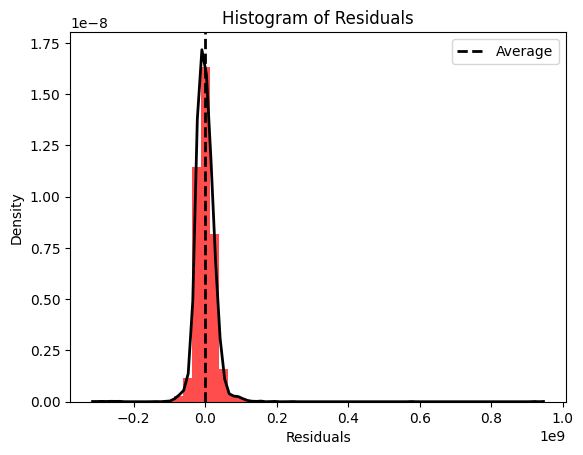

In [61]:
#Histogram of residuals - model 1
hist_residuals(res_1)

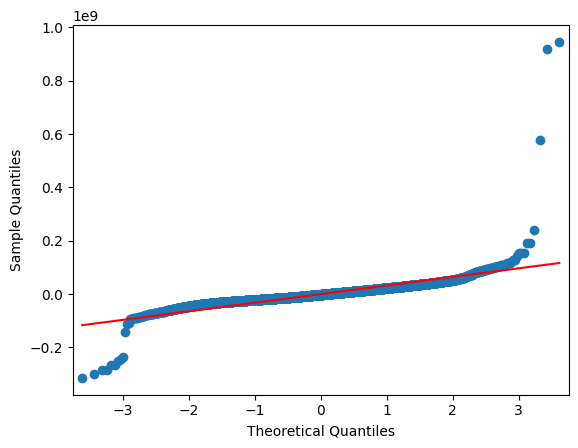

In [62]:
#QQ-plot - model 1
sm.qqplot(res_1, line = 's')
plt.show()

In [63]:
#Function to plot residuals vs. fitted values
def residuals_fittedvalues_plot(res, fitted_values):
    #Implement Lowess algorithm
    lowess_res = sm.nonparametric.lowess(res, fitted_values)

    #Scatter plot: residuals vs. fitted values
    plt.scatter(x = fitted_values, y = res, 
                color = 'red', alpha = 0.7, label = 'data')
    plt.title('Residuals vs. Fitted values')
    plt.xlabel('Fitted Values', fontsize = 12)
    plt.ylabel('Residuals', fontsize = 12)
    plt.grid()

    #Add LOWESS line
    plt.plot(lowess_res[:, 0], lowess_res[:, 1], 'black', 
             alpha = 0.8, linewidth = 2, label = 'LOWESS')
    plt.legend()

    return plt.show()

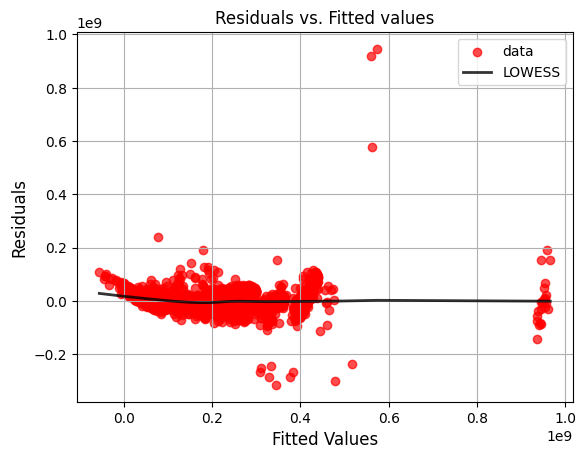

In [64]:
#Scatter plot of residuals vs. fitted values - model 1
residuals_fittedvalues_plot(res_1, y_train_pred_1)

In [65]:
#Predict the response in the test - model 1

#Create dummy variables for categorical variables in the test
dummy_vars = pd.get_dummies(test[['city',
                                  'fuel_type',
                                  'model',
                                  'color_levels', 
                                  'e_cond', 
                                  'c_cond', 
                                  'if_automatic']])

#Define base level for each categorical variable
dummy_vars.drop(columns = ['city_Tehran',
                           'fuel_type_gasoline',
                           'model_405',
                           'color_levels_white', 
                           'e_cond_A', 
                           'c_cond_A', 
                           'if_automatic_no' 
                           ], inplace = True)

#Define feature matrix 
X_ = test[['km', 'insurance_time_to_expire', 'age', 'b_cond']]
X_test = pd.concat([X_, dummy_vars], axis = 1)

#Prediction
y_test_pred_1 = model_1.predict(X_test)

In [66]:
#Absolute error
abs_err_1 = abs(test['price'] - y_test_pred_1)

#RMSE, MAPE, MAE, and median, sd, IQR, max, min of absolute errors
from scipy.stats import iqr
models_comp = pd.DataFrame({'RMSE': root_mean_squared_error(test['price'], y_test_pred_1),
                            'MAPE': mean_absolute_percentage_error(test['price'], y_test_pred_1) * 100,
                            'MAE' : abs_err_1.mean(),
                            'Median of AbsErrors' : abs_err_1.median(),
                            'SD of AbsErrors' :     abs_err_1.std(),
                            'IQR of AbsErrors':     iqr(abs_err_1),
                            'Min of AbsErrors':     abs_err_1.min(),
                            'Max of AbsErrors':     abs_err_1.max()}, 
                           index = ['LM - All Features'])
models_comp

,RMSE,MAPE,MAE,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM - All Features,3.234382e+07,11.963992,1.925602e+07,1.506041e+07,2.599164e+07,1.705814e+07,32090.924611,1.030863e+09


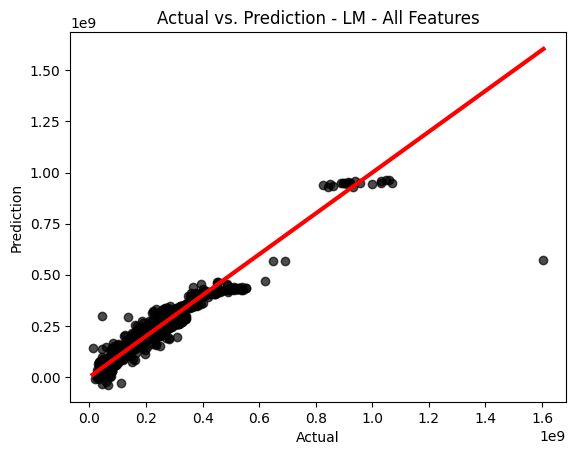

In [67]:
#Plot actual vs. prediction - Test
plt.scatter(test['price'], y_test_pred_1, c = 'black', alpha = 0.7)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction - LM - All Features')
#Add 45 degree line
xp = np.linspace(test['price'].min() - 0.2, test['price'].max() + 0.2, 100)
plt.plot(xp, xp, c = 'red', linewidth = 3)
plt.show()

In [68]:
#Box-Cox transformation
from sklearn.preprocessing import PowerTransformer
boxcox = PowerTransformer(method = 'box-cox')
boxcox.fit(y_train.values.reshape(-1, 1))
print(boxcox.lambdas_)

[0.49254611]


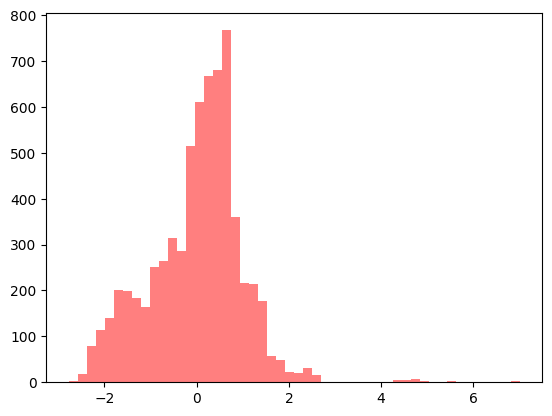

In [69]:
trans_y_train = boxcox.fit_transform(y_train.values.reshape(-1, 1))
plt.hist(trans_y_train, color = 'red', alpha = 0.5, bins = 50)
plt.show()

In [70]:
#Linear regression w/ Box-Cox transformation - model 2
from sklearn.linear_model import LinearRegression
#Create linear regression model
model_2 = LinearRegression()
#Fit the linear regressor on the train
model_2.fit(X_train, trans_y_train)
#Linear regression coefficients
print(model_2.coef_)
print(model_2.intercept_)

[[-6.49398175e-07  3.17010764e-03 -9.60608805e-02 -1.00980578e-02
   4.30387333e-02 -1.29848869e-03  2.08794475e-02 -4.11204304e-02
  -7.09225637e-03  3.18251757e-02  3.74375003e+00  1.80773276e-01
   7.85080843e-01  2.18751190e+00  3.04864295e-01 -7.17824666e-01
  -6.59376679e-01 -6.81792640e-01  1.31067359e+00 -5.91385996e-02
  -9.82937038e-02 -8.50714547e-02 -8.81405267e-02 -1.07588650e-01
  -1.37233500e-02 -2.16745450e-01 -1.17482693e-01 -3.22141155e-01
   6.47888384e-01]]
[0.66966825]


In [71]:
#Predict the response in the train
y_train_pred_2 = model_2.predict(X_train)
#Inverse transformation of predicted values
y_train_pred_2 = pd.Series(boxcox.inverse_transform(y_train_pred_2.reshape(-1, 1)).reshape(-1))

from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error, r2_score
#The root mean squared error
print('RMSE: {:0.3f}'.format(root_mean_squared_error(y_train, y_train_pred_2)))
#MAPE
print('MAPE: {:0.3f}'.format(mean_absolute_percentage_error(y_train, y_train_pred_2) * 100))
#The coefficient of determination
print('R2: {:0.3f}'.format(r2_score(y_train, y_train_pred_2)))

RMSE: 30436183.024
MAPE: 8.978
R2: 0.914


In [72]:
#Predict the response in the test - model 2
y_test_pred_2 = model_2.predict(X_test)
#Inverse transformation of predicted values
y_test_pred_2 = pd.Series(boxcox.inverse_transform(y_test_pred_2.reshape(-1, 1)).reshape(-1),
                         index = test.index)

#Absolute error
abs_err_2 = abs(test['price'] - y_test_pred_2)

#RMSE, MAPE, MAE, and median, sd, IQR, max, min of absolute errors
from scipy.stats import iqr
models_comp = pd.concat([models_comp, 
                         pd.DataFrame({'RMSE': root_mean_squared_error(test['price'], y_test_pred_2),
                                       'MAPE': mean_absolute_percentage_error(test['price'], y_test_pred_2) * 100, 
                                       'MAE':  abs_err_2.mean(),
                                       'Median of AbsErrors' : abs_err_2.median(),
                                       'SD of AbsErrors' :     abs_err_2.std(),
                                       'IQR of AbsErrors':     iqr(abs_err_2),
                                       'Min of AbsErrors':     abs_err_2.min(),
                                       'Max of AbsErrors':     abs_err_2.max()}, 
                                      index = ['LM - All Features - Box Cox'])])
models_comp

,RMSE,MAPE,MAE,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM - All Features,3.234382e+07,11.963992,1.925602e+07,1.506041e+07,2.599164e+07,1.705814e+07,32090.924611,1.030863e+09
LM - All Features - Box Cox,3.155827e+07,9.334699,1.720245e+07,1.347115e+07,2.646215e+07,1.653085e+07,25021.108784,1.142449e+09


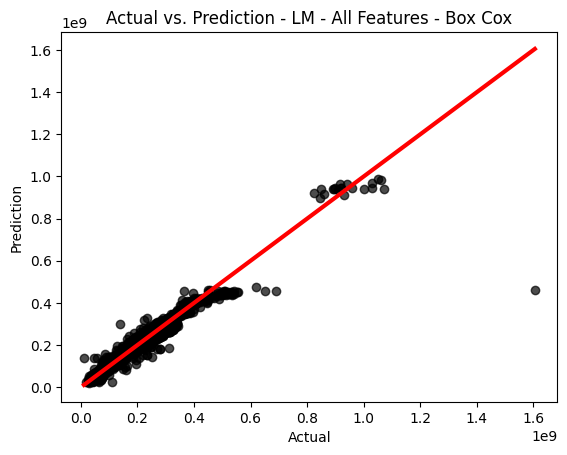

In [73]:
#Plot actual vs. prediction - Test
plt.scatter(test['price'], y_test_pred_2, c = 'black', alpha = 0.7)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction - LM - All Features - Box Cox')
#Add 45 degree line
xp = np.linspace(test['price'].min() - 0.2, test['price'].max() + 0.2, 100)
plt.plot(xp, xp, c = 'red', linewidth = 3)
plt.show()

In [74]:
#Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [75]:
#Feature selection
from sklearn.feature_selection import RFECV
rfe = RFECV(LinearRegression(), cv = 10, scoring = 'neg_root_mean_squared_error')
rfe.fit(X_train_scaled, trans_y_train)

#Selected features indices
selected_features_ind = np.where(rfe.support_)
print(selected_features_ind)

(array([ 0,  1,  2,  3,  4,  6,  7,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 25, 26, 27, 28]),)


In [76]:
#Check dataframe columns
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6653 entries, 9085 to 3584
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   km                          6653 non-null   int64
 1   insurance_time_to_expire    6653 non-null   int64
 2   age                         6653 non-null   int64
 3   b_cond                      6653 non-null   int64
 4   city_Isfahan                6653 non-null   bool 
 5   city_Mashhad                6653 non-null   bool 
 6   city_Shiraz                 6653 non-null   bool 
 7   fuel_type_CNG               6653 non-null   bool 
 8   fuel_type_LPG               6653 non-null   bool 
 9   fuel_type_hybrid            6653 non-null   bool 
 10  model_2008                  6653 non-null   bool 
 11  model_206                   6653 non-null   bool 
 12  model_207i                  6653 non-null   bool 
 13  model_407                   6653 non-null   bool 
 14  model_PARS

In [77]:
#Linear regression w/ selected features and Box Cox transformation - model 3
from sklearn.linear_model import LinearRegression
#Create linear regression model
model_3 = LinearRegression()
#Fit the linear regressor on the train
model_3.fit(X_train_scaled[:, selected_features_ind[0]], trans_y_train)
#Linear regression coefficients
print(model_3.coef_)
print(model_3.intercept_)

[[-0.07344617  0.01059853 -0.55728761 -0.06336133  0.0157758   0.00735642
  -0.0133362   0.00801693  0.21974777  0.08385192  0.22494126  0.09283543
   0.12160455 -0.13350262 -0.05089155 -0.11577975  0.0556405  -0.01368721
  -0.02195818 -0.02747739 -0.03351648 -0.03664739 -0.01755484 -0.01293956
  -0.01184735  0.15692408]]
[-1.00221278e-16]


In [78]:
#Predict the response in the train
y_train_pred_3 = model_3.predict(X_train_scaled[:, selected_features_ind[0]])
#Inverse transformation of predicted values
y_train_pred_3 = pd.Series(boxcox.inverse_transform(y_train_pred_3.reshape(-1, 1)).reshape(-1))

from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error, r2_score
#The root mean squared error
print('RMSE: {:0.3f}'.format(root_mean_squared_error(y_train, y_train_pred_3)))
#MAPE
print('MAPE: {:0.3f}'.format(mean_absolute_percentage_error(y_train, y_train_pred_3) * 100))
#The coefficient of determination
print('R2: {:0.3f}'.format(r2_score(y_train, y_train_pred_3)))

RMSE: 30433666.202
MAPE: 8.979
R2: 0.914


In [79]:
#Scale data
X_test_scaled = scaler.transform(X_test)

#Predict the response in the test - model 3
y_test_pred_3 = model_3.predict(X_test_scaled[:, selected_features_ind[0]])
#Inverse transformation of predicted values
y_test_pred_3 = pd.Series(boxcox.inverse_transform(y_test_pred_3.reshape(-1, 1)).reshape(-1),
                         index = test.index)

#Absolute error
abs_err_3 = abs(test['price'] - y_test_pred_3)

#RMSE, MAPE, MAE, and median, sd, IQR, max, min of absolute errors
from scipy.stats import iqr
models_comp = pd.concat([models_comp, 
                         pd.DataFrame({'RMSE': root_mean_squared_error(test['price'], y_test_pred_3),
                                       'MAPE': mean_absolute_percentage_error(test['price'], y_test_pred_3) * 100,
                                       'MAE' : abs_err_3.mean(),
                                       'Median of AbsErrors' : abs_err_3.median(),
                                       'SD of AbsErrors' :     abs_err_3.std(),
                                       'IQR of AbsErrors':     iqr(abs_err_3),
                                       'Min of AbsErrors':     abs_err_3.min(),
                                       'Max of AbsErrors':     abs_err_3.max()}, 
                                      index = ['LM - Selected Features - Box Cox'])])
models_comp

,RMSE,MAPE,MAE,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM - All Features,3.234382e+07,11.963992,1.925602e+07,1.506041e+07,2.599164e+07,1.705814e+07,32090.924611,1.030863e+09
LM - All Features - Box Cox,3.155827e+07,9.334699,1.720245e+07,1.347115e+07,2.646215e+07,1.653085e+07,25021.108784,1.142449e+09
LM - Selected Features - Box Cox,3.155841e+07,9.338216,1.720416e+07,1.348254e+07,2.646122e+07,1.656960e+07,2321.115759,1.142412e+09


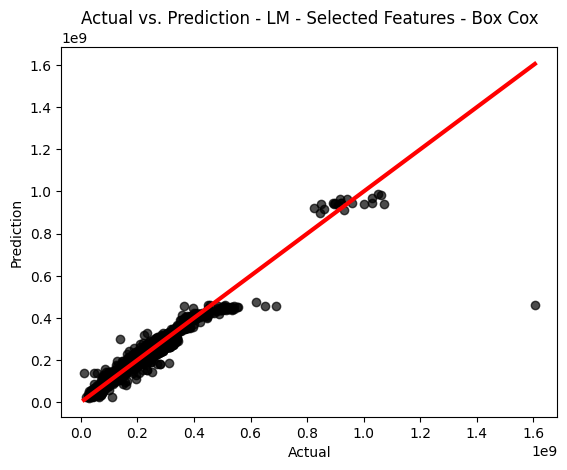

In [80]:
#Plot actual vs. prediction - Test
plt.scatter(test['price'], y_test_pred_3, c = 'black', alpha = 0.7)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction - LM - Selected Features - Box Cox')
#Add 45 degree line
xp = np.linspace(test['price'].min() - 0.2, test['price'].max() + 0.2, 100)
plt.plot(xp, xp, c = 'red', linewidth = 3)
plt.show()

In [81]:
#Implement Ridge regression w/o hyperparameter tuning - model 4
from sklearn.linear_model import Ridge
#Create ridge regression model
model_4 = Ridge(alpha = 0.1)
#Fit the ridge regressor on the train
model_4.fit(X_train_scaled, trans_y_train)
#Ridge regression coefficients
print(model_4.coef_)
print(model_4.intercept_)

[-7.34018443e-02  1.05997035e-02 -5.57062395e-01 -6.33055182e-02
  1.57076541e-02 -4.92232961e-04  7.25625214e-03 -1.34903619e-02
 -8.94578089e-04  8.01529785e-03  2.19736520e-01  8.36622402e-02
  2.24878460e-01  9.28173015e-02  1.21470575e-01 -1.33320549e-01
 -5.09750436e-02 -1.15855170e-01  5.56124204e-02 -1.36575570e-02
 -2.19768326e-02 -2.75521276e-02 -3.35043774e-02 -3.66985823e-02
 -9.64922457e-04 -1.75686810e-02 -1.28839278e-02 -1.18403966e-02
  1.56861627e-01]
[-1.00262003e-16]


In [82]:
#Grid
alpha_grid = 10 ** np.linspace(3, -3, 100)
print(alpha_grid)

[1.00000000e+03 8.69749003e+02 7.56463328e+02 6.57933225e+02
 5.72236766e+02 4.97702356e+02 4.32876128e+02 3.76493581e+02
 3.27454916e+02 2.84803587e+02 2.47707636e+02 2.15443469e+02
 1.87381742e+02 1.62975083e+02 1.41747416e+02 1.23284674e+02
 1.07226722e+02 9.32603347e+01 8.11130831e+01 7.05480231e+01
 6.13590727e+01 5.33669923e+01 4.64158883e+01 4.03701726e+01
 3.51119173e+01 3.05385551e+01 2.65608778e+01 2.31012970e+01
 2.00923300e+01 1.74752840e+01 1.51991108e+01 1.32194115e+01
 1.14975700e+01 1.00000000e+01 8.69749003e+00 7.56463328e+00
 6.57933225e+00 5.72236766e+00 4.97702356e+00 4.32876128e+00
 3.76493581e+00 3.27454916e+00 2.84803587e+00 2.47707636e+00
 2.15443469e+00 1.87381742e+00 1.62975083e+00 1.41747416e+00
 1.23284674e+00 1.07226722e+00 9.32603347e-01 8.11130831e-01
 7.05480231e-01 6.13590727e-01 5.33669923e-01 4.64158883e-01
 4.03701726e-01 3.51119173e-01 3.05385551e-01 2.65608778e-01
 2.31012970e-01 2.00923300e-01 1.74752840e-01 1.51991108e-01
 1.32194115e-01 1.149757

In [83]:
#K-fold cross validation to choose the best model
from sklearn.model_selection import cross_val_score

cv_errors = np.zeros(shape = len(alpha_grid)) #to save cv results

import time #to measure the processing time
start_time = time.time()

#K-fold cross validation
for i in range(len(alpha_grid)):
    ridge = Ridge(alpha = alpha_grid[i])
    scores = cross_val_score(estimator = ridge, 
                             X = X_train_scaled, 
                             y = trans_y_train,
                             scoring = 'neg_root_mean_squared_error',
                             cv = 10, n_jobs = -1)
    cv_errors[i] = scores.mean() 
#To check scoring: 
#https://scikit-learn.org/stable/modules/model_evaluation.html

end_time = time.time()
print('The Processing time is: ', end_time - start_time, 'seconds')

The Processing time is:  23.18501901626587 seconds


In [84]:
#Best lambda
best_alpha = alpha_grid[np.argmax(cv_errors)]
print(best_alpha)

30.538555088334157


In [85]:
#Ridge regression w/ Box Cox transformation - model 4
from sklearn.linear_model import Ridge
#Create ridge regression model
model_4 = Ridge(alpha = best_alpha)
#Fit the ridge regressor on the train
model_4.fit(X_train_scaled, trans_y_train)
#Ridge regression coefficients
print(model_4.coef_)
print(model_4.intercept_)

[-0.07677492  0.01057785 -0.55059655 -0.06456723  0.01528866 -0.00071424
  0.00717256 -0.01390111 -0.00161783  0.00757454  0.21855405  0.08182611
  0.2233387   0.09209103  0.11991443 -0.13416607 -0.05139917 -0.11583735
  0.05512857 -0.01411162 -0.02293516 -0.02830066 -0.03518169 -0.03814295
 -0.00120671 -0.01771943 -0.01289069 -0.01185159  0.15680293]
[-1.0021561e-16]


In [86]:
#Predict the response in the train
y_train_pred_4 = model_4.predict(X_train_scaled)
#Inverse transformation of predicted values
y_train_pred_4 = pd.Series(boxcox.inverse_transform(y_train_pred_4.reshape(-1, 1)).reshape(-1))

from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error, r2_score
#The root mean squared error
print('RMSE: {:0.3f}'.format(root_mean_squared_error(y_train, y_train_pred_4)))
#MAPE
print('MAPE: {:0.3f}'.format(mean_absolute_percentage_error(y_train, y_train_pred_4) * 100))
#The coefficient of determination
print('R2: {:0.3f}'.format(r2_score(y_train, y_train_pred_4)))

RMSE: 30461290.697
MAPE: 8.992
R2: 0.914


In [87]:
#Predict the response in the test - model 4
y_test_pred_4 = model_4.predict(X_test_scaled)
#Inverse transformation of predicted values
y_test_pred_4 = pd.Series(boxcox.inverse_transform(y_test_pred_4.reshape(-1, 1)).reshape(-1),
                         index = test.index)

#Absolute error
abs_err_4 = abs(test['price'] - y_test_pred_4)

#RMSE, MAPE, MAE, and median, sd, IQR, max, min of absolute errors
from scipy.stats import iqr
models_comp = pd.concat([models_comp, 
                         pd.DataFrame({'RMSE': root_mean_squared_error(test['price'], y_test_pred_4),
                                       'MAPE': mean_absolute_percentage_error(test['price'], y_test_pred_4) * 100,
                                       'MAE' : abs_err_4.mean(),
                                       'Median of AbsErrors' : abs_err_4.median(),
                                       'SD of AbsErrors' :     abs_err_4.std(),
                                       'IQR of AbsErrors':     iqr(abs_err_4),
                                       'Min of AbsErrors':     abs_err_4.min(),
                                       'Max of AbsErrors':     abs_err_4.max()}, 
                                      index = ['Ridge Regression - Box Cox'])])
models_comp

,RMSE,MAPE,MAE,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM - All Features,3.234382e+07,11.963992,1.925602e+07,1.506041e+07,2.599164e+07,1.705814e+07,32090.924611,1.030863e+09
LM - All Features - Box Cox,3.155827e+07,9.334699,1.720245e+07,1.347115e+07,2.646215e+07,1.653085e+07,25021.108784,1.142449e+09
LM - Selected Features - Box Cox,3.155841e+07,9.338216,1.720416e+07,1.348254e+07,2.646122e+07,1.656960e+07,2321.115759,1.142412e+09
Ridge Regression - Box Cox,3.160618e+07,9.353706,1.722058e+07,1.364902e+07,2.650753e+07,1.640778e+07,6508.664709,1.143860e+09


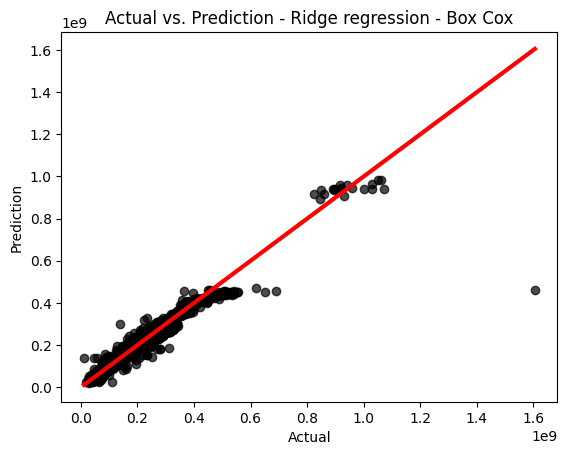

In [88]:
#Plot actual vs. prediction - Test
plt.scatter(test['price'], y_test_pred_4, c = 'black', alpha = 0.7)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction - Ridge regression - Box Cox')
#Add 45 degree line
xp = np.linspace(test['price'].min() - 0.2, test['price'].max() + 0.2, 100)
plt.plot(xp, xp, c = 'red', linewidth = 3)
plt.show()

In [89]:
#Implement Lasso regression w/o hyperparameter tuning - model 5
from sklearn.linear_model import Lasso
#Create Lasso regression model
model_5 = Lasso(alpha = 0.1)
#Fit the ridge regressor on the train
model_5.fit(X_train_scaled, trans_y_train)
#Ridge regression coefficients
print(model_5.coef_)
print(model_5.intercept_)

[-0.04029987  0.         -0.6569329  -0.          0.         -0.
  0.         -0.         -0.         -0.          0.11246966  0.
  0.0936183   0.          0.         -0.04835076 -0.         -0.03390583
  0.          0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.          0.16034849]
[-1.17803462e-16]


In [90]:
#K-fold cross validation to choose the best model
from sklearn.model_selection import cross_val_score

cv_errors = np.zeros(shape = len(alpha_grid)) #to save cv results

import time #to measure the processing time
start_time = time.time()

#K-fold cross validation
for i in range(len(alpha_grid)):
    lasso = Lasso(alpha = alpha_grid[i])
    scores = cross_val_score(estimator = lasso, 
                             X = X_train_scaled, 
                             y = trans_y_train,
                             scoring = 'neg_root_mean_squared_error',
                             cv = 10, n_jobs = -1)
    cv_errors[i] = scores.mean() 
#To check scoring: 
#https://scikit-learn.org/stable/modules/model_evaluation.html

end_time = time.time()
print('The Processing time is: ', end_time - start_time, 'seconds')

The Processing time is:  19.185322523117065 seconds


In [91]:
#Best lambda
best_alpha = alpha_grid[np.argmax(cv_errors)]
print(best_alpha)

0.001


In [92]:
#Lasso regression w/ Box Cox transformation - model 5
from sklearn.linear_model import Lasso
#Create ridge regression model
model_5 = Lasso(alpha = best_alpha)
#Fit the ridge regressor on the train
model_5.fit(X_train_scaled, trans_y_train)
#Ridge regression coefficients
print(model_5.coef_)
print(model_5.intercept_)

[-7.30152242e-02  9.64301840e-03 -5.59237514e-01 -6.29093930e-02
  1.46228801e-02 -0.00000000e+00  6.20837876e-03 -1.37843783e-02
 -2.29346281e-04  5.94635473e-03  2.18680720e-01  8.26143490e-02
  2.23436700e-01  9.17717820e-02  1.21062023e-01 -1.32427190e-01
 -4.99030313e-02 -1.14129456e-01  5.44807016e-02 -1.18334733e-02
 -2.06469667e-02 -2.59912348e-02 -3.18991248e-02 -3.48589946e-02
 -6.69418679e-05 -1.66965510e-02 -1.20935497e-02 -1.08172141e-02
  1.56890495e-01]
[-1.00264601e-16]


In [93]:
#Predict the response in the train
y_train_pred_5 = model_5.predict(X_train_scaled)
#Inverse transformation of predicted values
y_train_pred_5 = pd.Series(boxcox.inverse_transform(y_train_pred_5.reshape(-1, 1)).reshape(-1))

from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error, r2_score
#The root mean squared error
print('RMSE: {:0.3f}'.format(root_mean_squared_error(y_train, y_train_pred_5)))
#MAPE
print('MAPE: {:0.3f}'.format(mean_absolute_percentage_error(y_train, y_train_pred_5) * 100))
#The coefficient of determination
print('R2: {:0.3f}'.format(r2_score(y_train, y_train_pred_5)))

RMSE: 30475537.197
MAPE: 8.988
R2: 0.914


In [94]:
#Predict the response in the test - model 5
y_test_pred_5 = model_5.predict(X_test_scaled)
#Inverse transformation of predicted values
y_test_pred_5 = pd.Series(boxcox.inverse_transform(y_test_pred_5.reshape(-1, 1)).reshape(-1),
                         index = test.index)

#Absolute error
abs_err_5 = abs(test['price'] - y_test_pred_5)

#RMSE, MAPE, MAE, and median, sd, IQR, max, min of absolute errors
from scipy.stats import iqr
models_comp = pd.concat([models_comp, 
                         pd.DataFrame({'RMSE': root_mean_squared_error(test['price'], y_test_pred_5),
                                       'MAPE': mean_absolute_percentage_error(test['price'], y_test_pred_5) * 100,
                                       'MAE' : abs_err_5.mean(),
                                       'Median of AbsErrors' : abs_err_5.median(),
                                       'SD of AbsErrors' :     abs_err_5.std(),
                                       'IQR of AbsErrors':     iqr(abs_err_5),
                                       'Min of AbsErrors':     abs_err_5.min(),
                                       'Max of AbsErrors':     abs_err_5.max()}, 
                                      index = ['Lasso Regression - Box Cox'])])
models_comp

,RMSE,MAPE,MAE,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM - All Features,3.234382e+07,11.963992,1.925602e+07,1.506041e+07,2.599164e+07,1.705814e+07,32090.924611,1.030863e+09
LM - All Features - Box Cox,3.155827e+07,9.334699,1.720245e+07,1.347115e+07,2.646215e+07,1.653085e+07,25021.108784,1.142449e+09
LM - Selected Features - Box Cox,3.155841e+07,9.338216,1.720416e+07,1.348254e+07,2.646122e+07,1.656960e+07,2321.115759,1.142412e+09
Ridge Regression - Box Cox,3.160618e+07,9.353706,1.722058e+07,1.364902e+07,2.650753e+07,1.640778e+07,6508.664709,1.143860e+09
Lasso Regression - Box Cox,3.161716e+07,9.347377,1.721475e+07,1.371207e+07,2.652440e+07,1.642542e+07,5719.997015,1.146068e+09


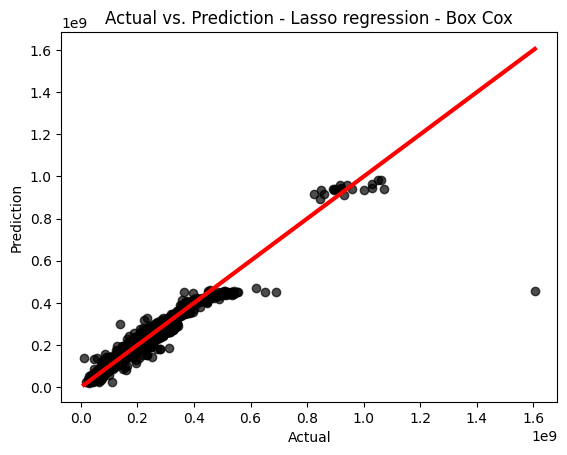

In [95]:
#Plot actual vs. prediction - Test
plt.scatter(test['price'], y_test_pred_5, c = 'black', alpha = 0.7)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction - Lasso regression - Box Cox')
#Add 45 degree line
xp = np.linspace(test['price'].min() - 0.2, test['price'].max() + 0.2, 100)
plt.plot(xp, xp, c = 'red', linewidth = 3)
plt.show()

In [96]:
#Marketing requirement - model 2
print(np.sum(abs((test['price'] - y_test_pred_2) / test['price']) * 100 <= 15) / test.shape[0] * 100)

87.37727910238429


# End of Code